In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import geopandas as gpd
from matplotlib import cm
from scipy import interpolate
import matplotlib.colors as mcolors
import mapclassify as mc

In [47]:
df1=pd.read_csv('athlete_events.csv')
df1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [51]:
df1[(df1.NOC == "GDR") & (df1.Year > 1986)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
761,435,Silke Abicht,F,19.0,156.0,46.0,East Germany,GDR,1988 Summer,1988,Summer,Seoul,Diving,Diving Women's Platform,NaN
1601,892,Peter Adeberg,M,19.0,185.0,75.0,East Germany,GDR,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Men's 500 metres,NaN
1602,892,Peter Adeberg,M,19.0,185.0,75.0,East Germany,GDR,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Men's 1,000 metres",NaN
1603,892,Peter Adeberg,M,19.0,185.0,75.0,East Germany,GDR,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Men's 1,500 metres",NaN
6285,3525,Uwe Ampler,M,24.0,182.0,77.0,East Germany,GDR,1988 Summer,1988,Summer,Seoul,Cycling,"Cycling Men's Road Race, Individual",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268613,134386,Steffen Zesner,M,20.0,185.0,80.0,East Germany,GDR,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
268614,134386,Steffen Zesner,M,20.0,185.0,80.0,East Germany,GDR,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Silver
269888,135032,Kathrin Zimmermann,F,21.0,173.0,65.0,East Germany,GDR,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 200 metres Backstroke,Silver
270727,135393,Steffen Zhlke,M,23.0,198.0,92.0,East Germany,GDR,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Bronze


In [27]:
rNOC = np.where(df1.NOC == "GDR", "GER",
         np.where(df1.NOC ==  "FRG","GER", df1.NOC))
df1["NOC"] = rNOC

In [28]:
pdep_summer = []

    
NOC_filter = df1.NOC.unique()
josummer = df1[(df1.Season == "Summer") ]
anunique_summer = josummer.Year.unique()

for i in anunique_summer:
    pdep_summer.append(len(josummer[(josummer.Year == i)].Sport.unique()))
                       
                       
sport_df = pd.DataFrame({"Year":anunique_summer, "Total":pdep_summer})   
sport_df.sort_values(by = "Year", inplace = True)

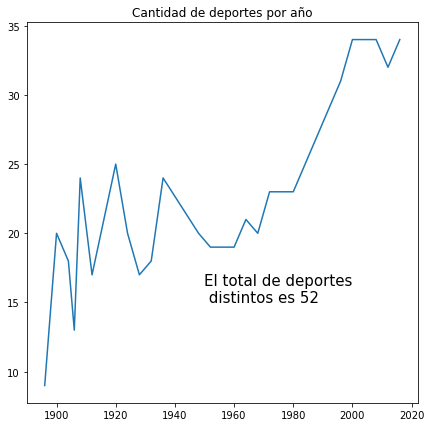

In [29]:
from pylab import figure, text, scatter, show
plt.figure(figsize = (7,7))
plt.title("Cantidad de deportes por año")
plt.plot(sport_df.Year, sport_df.Total)
text(1950,15,"El total de deportes\n distintos es {}".format(len(df1[(df1.Season == "Summer")].Sport.unique())),fontsize = 15)
plt.show()

In [30]:
df1[df1.Year.isin([1990,1994])]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
15,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
16,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270919,135483,Andrey Aleksandrovich Zuyev,M,29.0,NaN,NaN,Russia,RUS,1994 Winter,1994,Winter,Lillehammer,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
270989,135509,Roman Volodymyrovych Zvonkov,M,26.0,187.0,84.0,Ukraine,UKR,1994 Winter,1994,Winter,Lillehammer,Biathlon,Biathlon Men's 20 kilometres,NaN
270990,135509,Roman Volodymyrovych Zvonkov,M,26.0,187.0,84.0,Ukraine,UKR,1994 Winter,1994,Winter,Lillehammer,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,NaN
271092,135559,Pawe Jan Zygmunt,M,21.0,182.0,79.0,Poland,POL,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Men's 1,500 metres",NaN


# Primera pregunta

In [31]:
def plotlines(nombre_path, temporada = "Summer", paises= 15,overmean =0.5,ratioinf = 0,ratiosup =  1,Totalinf  = 0,Totalsup = 1000 ,plotbg = False,issplines = False, globaly = False, undermean =  1):   
    plt.figure(figsize = (15,10))
    color=iter(cm.tab10(np.linspace(0,15,150)))
    cantidad = []
    
    if globaly == True:
            data_xyearw = df1[(df1.Sex == "F") & (df1.Season == temporada)].iloc[:,[2,9]].groupby(["Year"]).count()
            data_xyearm = df1[(df1.Sex == "M") & (df1.Season == temporada)].iloc[:,[2,9]].groupby(["Year"]).count()
            pyear_concat = pd.concat([data_xyearm,data_xyearw], axis = 1, sort = False).reset_index()
            pyear_concat = pyear_concat.fillna(0)
            pyear_concat["ratio"] = pyear_concat.iloc[:,2]/(pyear_concat.iloc[:,2]+pyear_concat.iloc[:,1])
            plt.plot(pyear_concat.Year, pyear_concat.ratio,  linewidth=3,c = "black")
            plt.annotate("Global", (pyear_concat.Year.to_numpy()[-1]+1  ,pyear_concat.ratio.to_numpy()[-1]), 
                        horizontalalignment='left',
                        verticalalignment='center',
                        c = "black")
        
    for j in range(1,paises):

        pmuj_summer = []
        phom_summer = []
        ptot_summer = []

        NOC_filter = df1.NOC.unique()
        josummer = df1[(df1.Season == temporada) & (df1.NOC == NOC_filter[j])]
        anunique_summer = josummer.Year.unique()

        
        
        for i in anunique_summer:
            pmuj_summer.append(len(josummer[(josummer.Year == i) & (josummer.Sex == "F")].Name.unique()))
            phom_summer.append(len(josummer[(josummer.Year == i) & (josummer.Sex == "M")].Name.unique()))
            ptot_summer.append(len(josummer[josummer.Year == i].Name.unique()))
            
        
        hom_muj_summer = np.array(phom_summer) - np.array(pmuj_summer)
        ratiomt_summer = np.array(pmuj_summer)/np.array(ptot_summer)
        ratioht_summer = np.array(phom_summer)/np.array(ptot_summer)

        data_for_plot = pd.DataFrame({"Year":anunique_summer,
                                      "Total":ptot_summer,
                                      "pmuj":pmuj_summer,
                                      "phom":phom_summer,
                                     "hom_muj_summer":hom_muj_summer,
                                     "ratiomt_summer":ratiomt_summer,
                                     "ratioht_summer":ratioht_summer})
        
        data_for_plot.sort_values(by = "Year",inplace = True)
        pyear_concat2 = pyear_concat.copy()
        pyear_concat2 = pyear_concat2[pyear_concat.Year.isin(data_for_plot.Year)]
        data_for_plot["GMean"] = pyear_concat2.ratio.to_numpy()
        data_for_plot["Ismayor"] = data_for_plot.ratiomt_summer.to_numpy() > data_for_plot.GMean.to_numpy()
        isovermean = sum(data_for_plot.ratiomt_summer.to_numpy() > data_for_plot.GMean.to_numpy())/len(data_for_plot.ratiomt_summer.to_numpy())        
        if data_for_plot.ratiomt_summer.to_numpy()[-1] < ratiosup and \
            data_for_plot.ratiomt_summer.to_numpy()[-1] > ratioinf and \
            data_for_plot.Total.to_numpy()[-1] > Totalinf and \
            data_for_plot.Total.to_numpy()[-1] < Totalsup and \
            isovermean > overmean and \
            isovermean < undermean:
            
            plt.axis((1880,2020,0,1))

            c =  next(color)

            x = data_for_plot.Year.to_numpy()
            y = data_for_plot.ratiomt_summer.to_numpy()
            
            if issplines == True:
                x_new = np.linspace(x.min(),x.max(),300)
                f = interpolate.interp1d(x, y, kind='quadratic')
                y_smooth=f(x_new)
            else:
                x_new = data_for_plot.Year.to_numpy()
                y_smooth = data_for_plot.ratiomt_summer.to_numpy()

            plt.plot(x_new, y_smooth, linewidth=2,c=c, zorder=2)
            plt.annotate(NOC_filter[j], (data_for_plot.Year.to_numpy()[-1] + 1 ,data_for_plot.ratiomt_summer.to_numpy()[-1]), 
                            horizontalalignment='left',
                            verticalalignment='center',
                            c = c)
            plt.annotate(NOC_filter[j], (data_for_plot.Year.to_numpy()[0] -1 ,data_for_plot.ratiomt_summer.to_numpy()[0]), 
                            horizontalalignment='left',
                            verticalalignment='center',
                            c = c)
            cantidad.append(NOC_filter[j])
        else:
            if plotbg == True:
                x_new = data_for_plot.Year.to_numpy()
                y_smooth = data_for_plot.ratiomt_summer.to_numpy()
                if issplines == True:
                    x_new = np.linspace(x.min(),x.max(),300)
                    f = interpolate.interp1d(x, y, kind='quadratic')
                    y_smooth=f(x_new)
                
                 
                plt.plot(x_new, y_smooth,c="whitesmoke", zorder=1)
    plt.savefig(nombre_path, format='svg')
    return cantidad



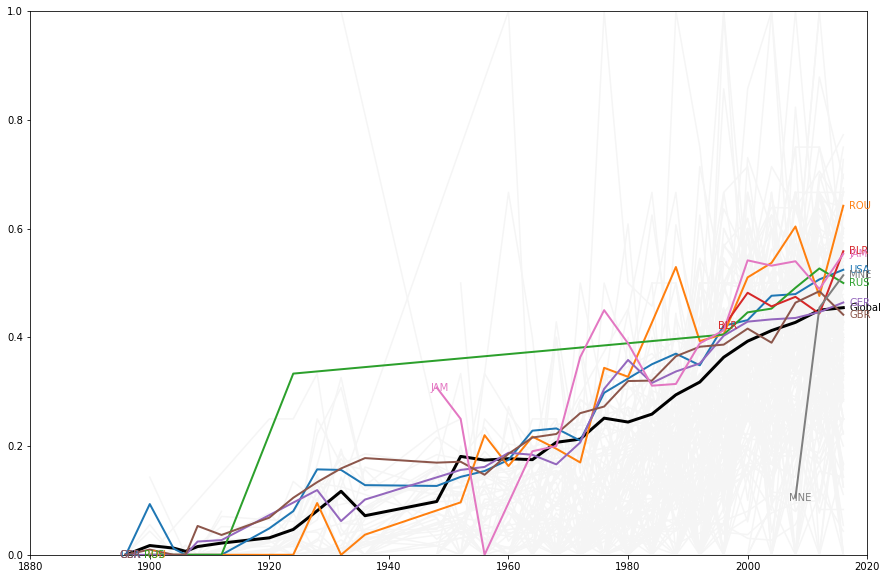

In [46]:
xx= plotlines( paises= len(df1.NOC.unique()),overmean = 0.6,Totalinf  = 30 ,plotbg = True, globaly = True, nombre_path = "../Tarea1/Dibujos/lineas_sobre.svg")

['BLR', 'GBR', 'JAM']

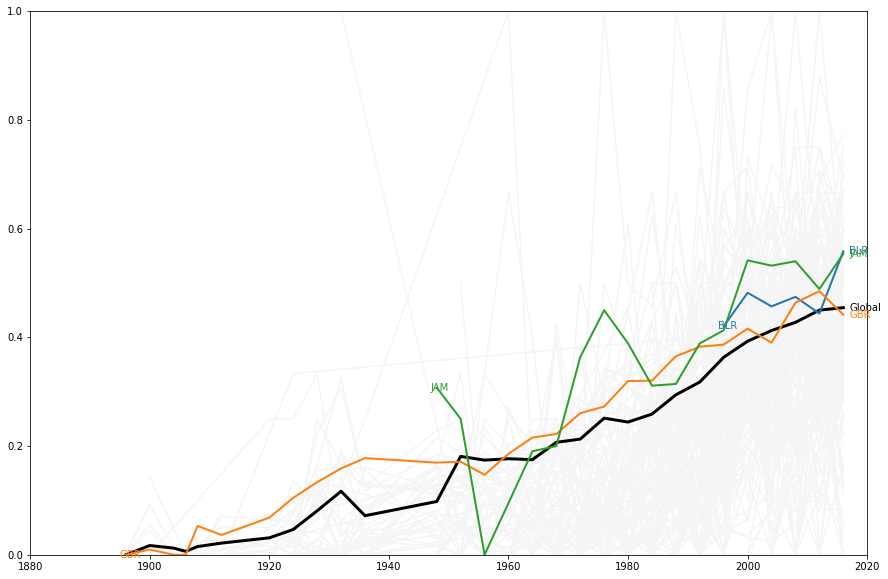

In [32]:
plotlines( paises= len(df1.NOC.unique()),overmean = 0.7,Totalinf  = 30 ,plotbg = True, globaly = True, nombre_path = "../Tarea1/Dibujos/lineas_sobre.svg")

['CUB', 'TUN', 'KEN', 'PUR', 'ECU']

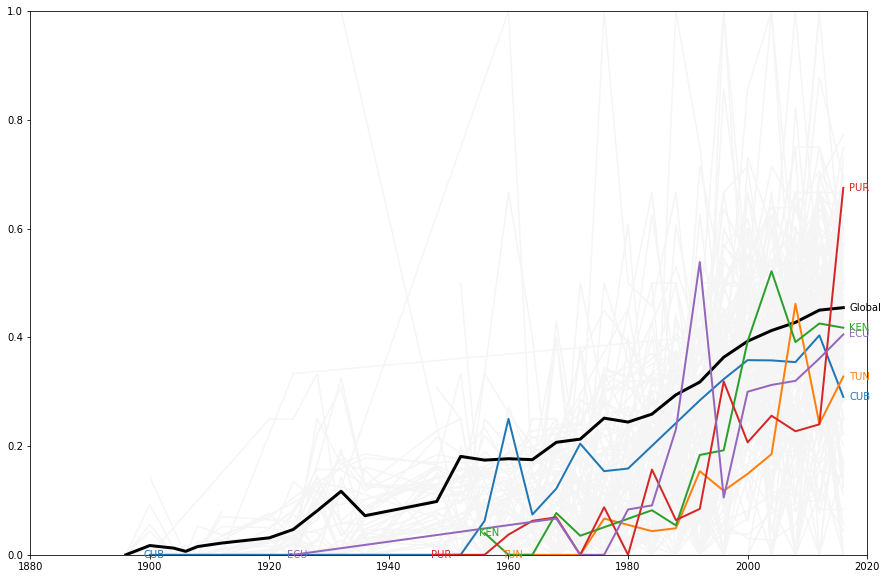

In [33]:
plotlines( paises= len(df1.NOC.unique()),overmean = 0, undermean = 0.08,Totalinf  = 30 ,plotbg = True, globaly = True, nombre_path ="../Tarea1/Dibujos/lineas_bajo.svg" )

In [34]:
def countmean(temporada = "Summer", globaly = False, paises = 15):   
    plt.figure(figsize = (15,10))
    color=iter(cm.tab10(np.linspace(0,50,len(df1.NOC.unique()))))
    cantidad = 0
    
    if globaly == True:
            data_xyearw = df1[(df1.Sex == "F") & (df1.Season == temporada)].iloc[:,[2,9]].groupby(["Year"]).count()
            data_xyearm = df1[(df1.Sex == "M") & (df1.Season == temporada)].iloc[:,[2,9]].groupby(["Year"]).count()
            pyear_concat = pd.concat([data_xyearm,data_xyearw], axis = 1, sort = False).reset_index()
            pyear_concat = pyear_concat.fillna(0)
            pyear_concat["ratio"] = pyear_concat.iloc[:,2]/(pyear_concat.iloc[:,2]+pyear_concat.iloc[:,1])
          
    for j in range(1,paises):

        pmuj_summer = []
        phom_summer = []
        ptot_summer = []

        NOC_filter = df1.NOC.unique()[j]
        josummer = df1[(df1.Season == temporada) & (df1.NOC == NOC_filter)]
        anunique_summer = josummer.Year.unique()

        
        
        for i in anunique_summer:
            pmuj_summer.append(len(josummer[(josummer.Year == i) & (josummer.Sex == "F")].Name.unique()))
            phom_summer.append(len(josummer[(josummer.Year == i) & (josummer.Sex == "M")].Name.unique()))
            ptot_summer.append(len(josummer[josummer.Year == i].Name.unique()))
            
        
        hom_muj_summer = np.array(phom_summer) - np.array(pmuj_summer)
        ratiomt_summer = np.array(pmuj_summer)/np.array(ptot_summer)
        ratioht_summer = np.array(phom_summer)/np.array(ptot_summer)

        data_for_plot = pd.DataFrame({"Year":anunique_summer,
                                      "Total":ptot_summer,
                                      "pmuj":pmuj_summer,
                                      "phom":phom_summer,
                                     "hom_muj_summer":hom_muj_summer,
                                     "ratiomt_summer":ratiomt_summer,
                                     "ratioht_summer":ratioht_summer})
        data_for_plot.sort_values(by = "Year",inplace = True)
        pyear_concat2 = pyear_concat.copy()
        pyear_concat2 = pyear_concat2[pyear_concat.Year.isin(data_for_plot.Year)]
        data_for_plot["GMean"] = pyear_concat2.ratio.to_numpy()
        data_for_plot["Ismayor"] = data_for_plot.ratiomt_summer.to_numpy() > data_for_plot.GMean.to_numpy()
        isovermean = sum(data_for_plot.ratiomt_summer.to_numpy() > data_for_plot.GMean.to_numpy())/len(data_for_plot.ratiomt_summer.to_numpy())
        print("{} {}".format(NOC_filter, isovermean))

        

In [35]:
countmean(globaly = True, paises = 50)

DEN 0.2857142857142857
NED 0.5925925925925926
USA 0.6785714285714286
FIN 0.23076923076923078
NOR 0.2962962962962963
ROU 0.6363636363636364
EST 0.0
FRA 0.13793103448275862
MAR 0.0
ESP 0.08695652173913043
EGY 0.0
IRI 0.0
BUL 0.3
ITA 0.10344827586206896
CHA 0.4166666666666667
AZE 0.0
SUD 0.08333333333333333
RUS 0.7
ARG 0.0
CUB 0.047619047619047616
BLR 0.8333333333333334
GRE 0.13793103448275862
CMR 0.21428571428571427
TUR 0.08695652173913043
CHI 0.0
MEX 0.08695652173913043
URS 0.5555555555555556
NCA 0.3333333333333333
HUN 0.3333333333333333
NGR 0.25
ALG 0.0
KUW 0.0
BRN 0.2222222222222222
PAK 0.0
IRQ 0.07142857142857142
UAR 0.0
LIB 0.17647058823529413
QAT 0.0
MAS 0.23076923076923078
GER 0.6153846153846154
CAN 0.5555555555555556
IRL 0.14285714285714285
AUS 0.48148148148148145
RSA 0.2631578947368421
ERI 0.0
TAN 0.0
JOR 0.4
TUN 0.07142857142857142
LBA 0.0


<Figure size 1080x720 with 0 Axes>

# Segunda pregunta

In [36]:
def datcoropletas(year_max= 2020, year_min = 0):
    import warnings
    warnings.filterwarnings("ignore")
    NOC_list = []
    slope_list = []
    for j in range(0, len(df1.NOC.unique())):
        #for j in range(1,30):
        pmuj_summer = []
        phom_summer = []
        ptot_summer = []

        NOC_filter = df1.NOC.unique()
        #Aqui se cambia si es verano o invierno, los paises a considerar y los años a considerar
        josummer = df1[(df1.Season == "Summer") & (df1.NOC == NOC_filter[j])& (df1.Year < year_max)& (df1.Year > year_min)]
        anunique_summer = josummer.Year.unique()

        if len(josummer) != 0:

            for i in anunique_summer:
                pmuj_summer.append(len(josummer[(josummer.Year == i) & (josummer.Sex == "F")].Name.unique()))
                phom_summer.append(len(josummer[(josummer.Year == i) & (josummer.Sex == "M")].Name.unique()))
                ptot_summer.append(len(josummer[josummer.Year == i].Name.unique()))


            hom_muj_summer = np.array(phom_summer) - np.array(pmuj_summer)
            ratiomt_summer = np.array(pmuj_summer)/np.array(ptot_summer)
            ratioht_summer = np.array(phom_summer)/np.array(ptot_summer)

            data_for_plot = pd.DataFrame({"Year":anunique_summer,
                                          "Total":ptot_summer,
                                          "pmuj":pmuj_summer,
                                          "phom":phom_summer,
                                         "hom_muj_summer":hom_muj_summer,
                                         "ratiomt_summer":ratiomt_summer,
                                         "ratioht_summer":ratioht_summer})
            data_for_plot.sort_values(by = "Year",inplace = True)


        #    x = data_for_plot.Year
        #    y = data_for_plot.ratiomt_summer
        #    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        #    NOC_list.append(NOC_filter[j])
        #    slope_list.append(slope)


            x = data_for_plot.Year
            y = data_for_plot.ratiomt_summer
            ling = np.polyfit(x, y, 1)
            NOC_list.append(NOC_filter[j])
            slope_list.append(ling[0])

            data_slope = pd.DataFrame({"NOC":NOC_list,
                                      "Slope":slope_list})
        else:
            NOC_list.append(NOC_filter[j])
            slope_list.append(0) 
    data_slope["Slope"] = data_slope["Slope"]*1000
    return data_slope

In [37]:
def mapcoropletass(data_slope ,nombre_archivo ,bins = [0,5,10,15,30], clusdict = {0: 1, 1: 2, 2: 3, 3: 4} ,path = False):
    NOC_codes = pd.read_csv("../Tarea1/countryNOC.csv")
    NOC_codes=NOC_codes.append({"Country":"S. Sudan","NOC":"SSD", "ISO code":"SSD"}, ignore_index = True)
    data_merg=pd.merge(data_slope, NOC_codes)
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    for_plotting1 = world.merge(data_merg, left_on = 'name', right_on = 'Country')
    for_plotting2 = world.merge(data_merg, left_on = 'iso_a3', right_on = 'ISO code')
    for_plotting3 = world.merge(data_merg, left_on = 'iso_a3', right_on = 'NOC')
    for_plotting = pd.concat([for_plotting1,for_plotting2, for_plotting3]).drop_duplicates().reset_index(drop = True)
    for_plotting = for_plotting.iloc[:,:8]

    bins = bins
    ud = mc.UserDefined(for_plotting['Slope'], bins)
    labels = [str(e) for e in np.unique(ud.yb)]
    bpll = [ labels[b] for b in ud.yb ]
    for_plotting["Slope"] = bpll

    color_map = plt.cm.get_cmap('RdYlBu')
    reversed_color_map = color_map.reversed()

    ax = for_plotting.dropna().plot(column='Slope',
                                    cmap =reversed_color_map, 
                                    figsize=(30,15),
                                    edgecolor='k',
                                    legend = True);

    def replace_legend_items(legend, mapping):
        for txt in legend.texts:
            for k,v in mapping.items():
                if txt.get_text() == str(k):
                    txt.set_text(v)

    clusdict=clusdict              
    replace_legend_items(ax.get_legend(), clusdict)
    if path == True:
        plt.savefig(path, format='svg')
        plt.show()
    
    plt.savefig(nombre_archivo, format='svg')

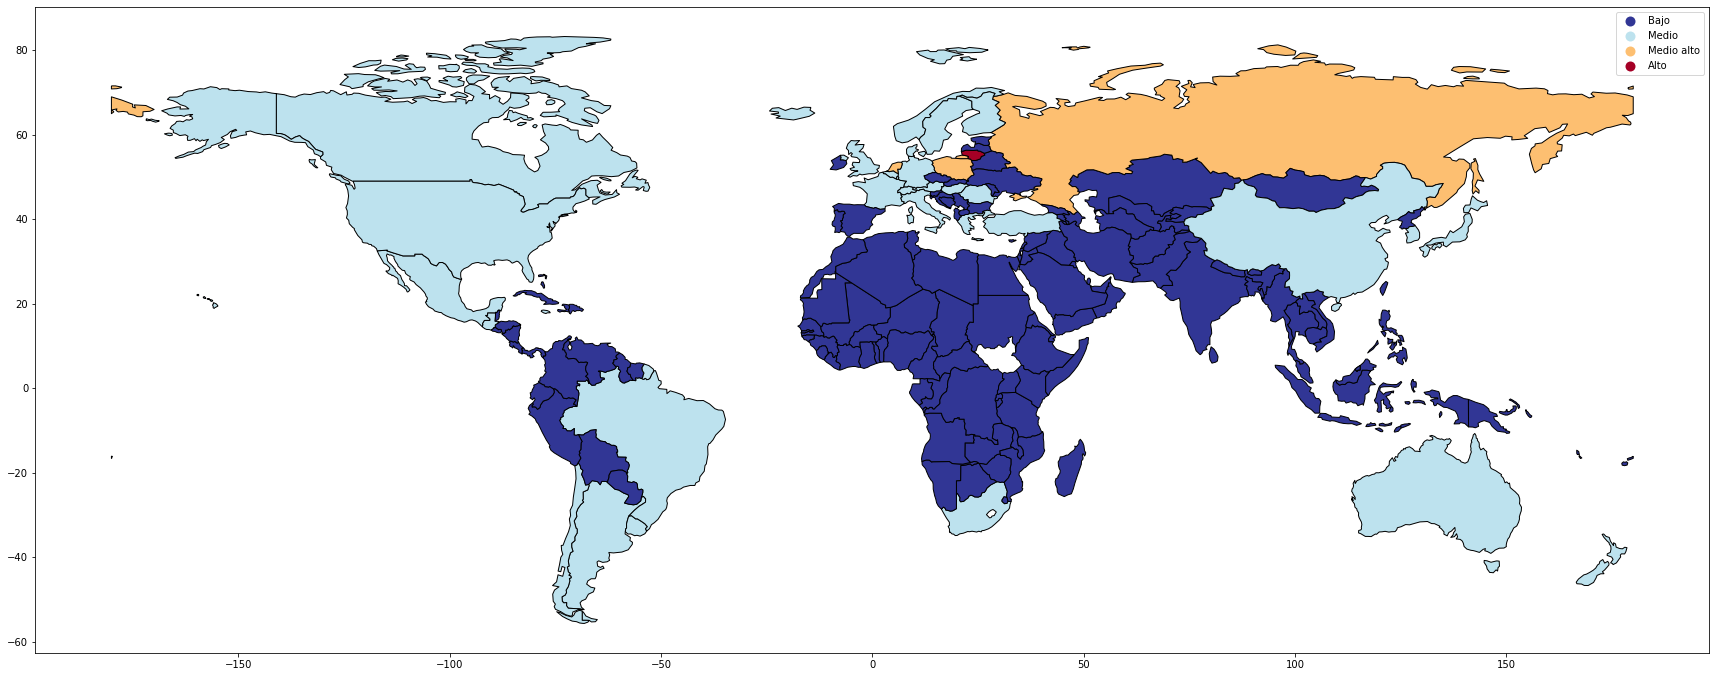

In [38]:
mapcoropletass(datcoropletas(1950,1880),bins = [0,5,15],clusdict = { 0: "Bajo",1:"Medio",2:"Medio alto", 3:"Alto",5:"Muy alto"}, nombre_archivo = "../Tarea1/Dibujos/mapa1950.svg")

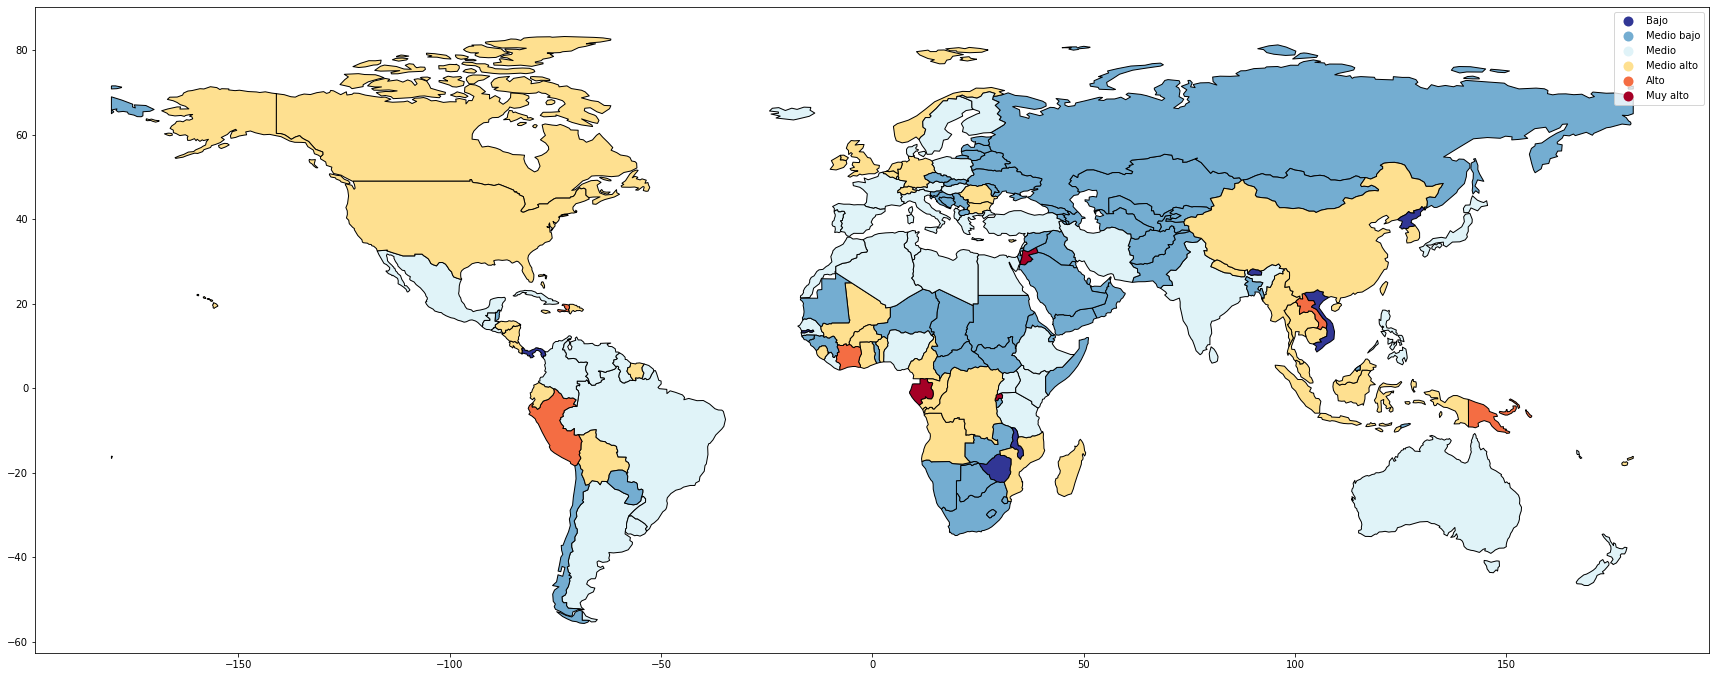

In [39]:
mapcoropletass(datcoropletas(1990,1950),bins = [-5,0,5,15,30],clusdict = {0: "Bajo", 1: "Medio bajo",2:"Medio",3:"Medio alto", 4:"Alto",5:"Muy alto"}, nombre_archivo = "../Tarea1/Dibujos/mapa1990.svg")

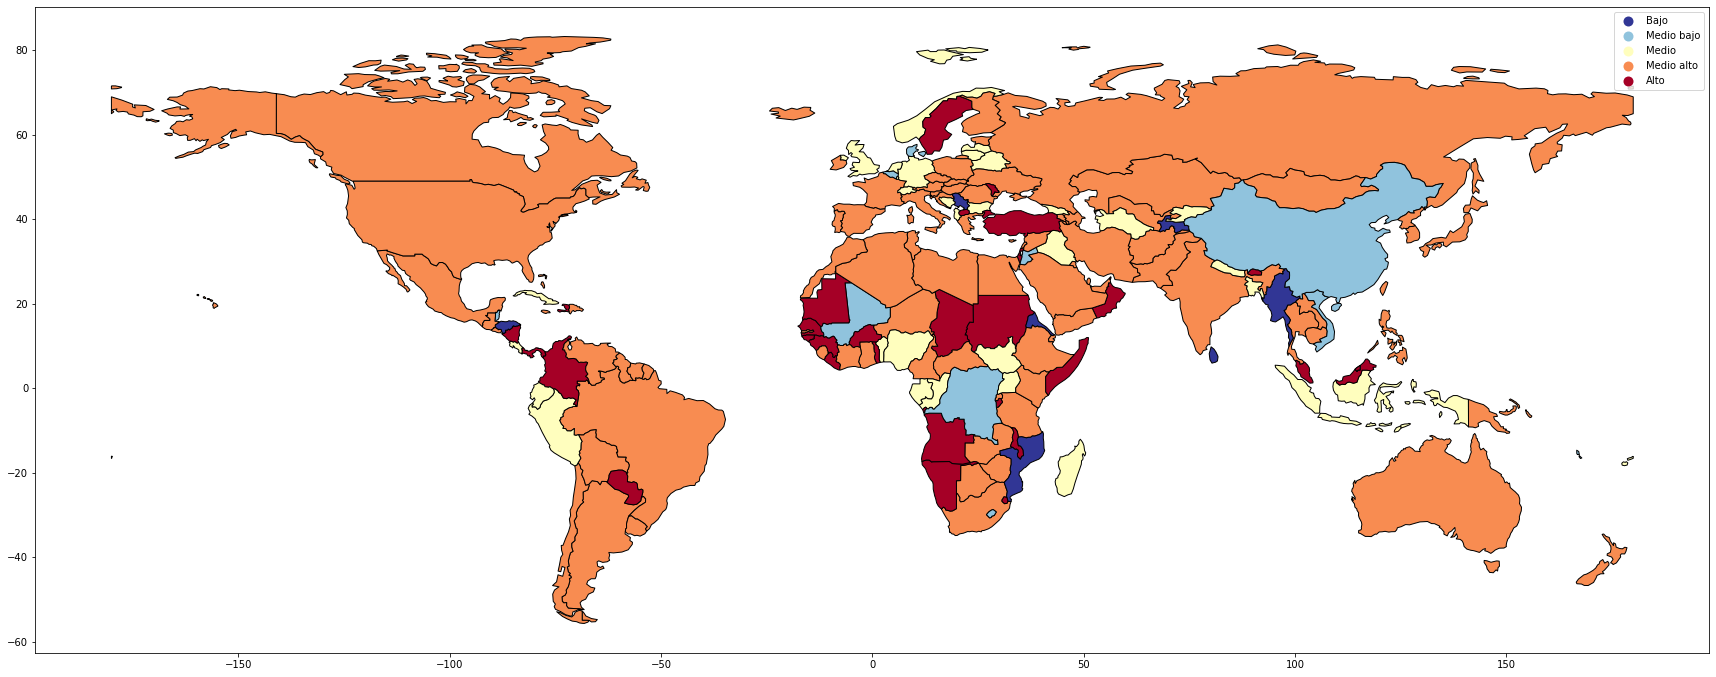

In [40]:
mapcoropletass(datcoropletas(2020,1990),bins = [-5,0,5,15,30],clusdict = {0: "Bajo", 1: "Medio bajo",2:"Medio",3:"Medio alto", 4:"Alto",5:"Muy alto"}, nombre_archivo = "../Tarea1/Dibujos/mapa2020.svg")

# Tercera pregunta

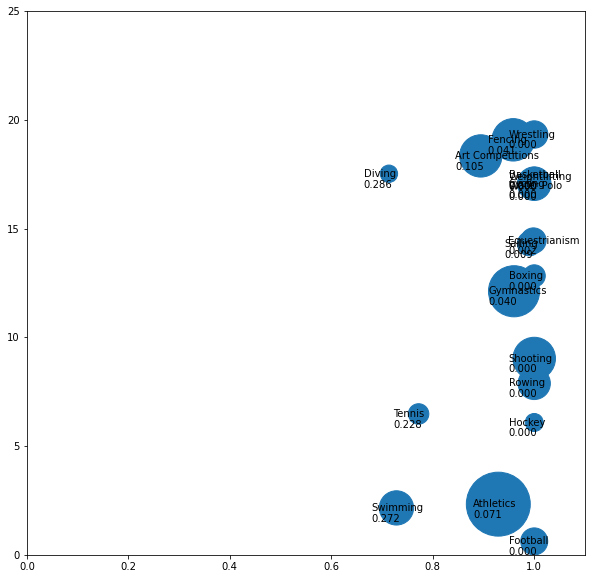

In [41]:
year_limit = 1950
data_events = df1[(df1.Year < year_limit) & (df1.Season == "Summer")].groupby(["Sport", "Sex"]).count()
data_events = data_events["ID"].reset_index(drop = False)
participantes = []
porcentaje_m = []
porcentaje_h = []
deportes = []
for i in data_events.Sport.unique():
    pps = data_events[data_events.Sport == i].ID.sum()
    participantes.append(pps)
    pps_m = data_events[(data_events.Sport == i) & (data_events.Sex == "F")].ID.sum()/pps
    porcentaje_m.append(pps_m)
    pps_h = abs(1-pps_m)
    porcentaje_h.append(pps_h)
    deportes.append(i)

plt.figure(figsize = (10,10))
part_per_sport = pd.DataFrame({"Sport":deportes, "PartTotal":participantes, "perc_muj":porcentaje_m,"perc_hom":porcentaje_h})
filtro = part_per_sport.PartTotal > 300
part_per_sport = part_per_sport[filtro]
randomy = np.random.uniform(low=0.5, high=20, size=len(part_per_sport))
plt.axis((0,1.1,0,25))
plt.scatter(part_per_sport.perc_hom, randomy, s = 0.5*part_per_sport.PartTotal )

for i, txt in enumerate(part_per_sport.Sport):
    plt.annotate(txt, (part_per_sport.perc_hom.to_numpy()[i]-0.05, randomy[i]), 
                horizontalalignment='left',
                verticalalignment='center')
    
for i, txt in enumerate(part_per_sport.perc_muj):
    plt.annotate("{:.3f}".format(txt), (part_per_sport.perc_hom.to_numpy()[i]-0.05, randomy[i]-0.5), 
                horizontalalignment='left',
                verticalalignment='center')

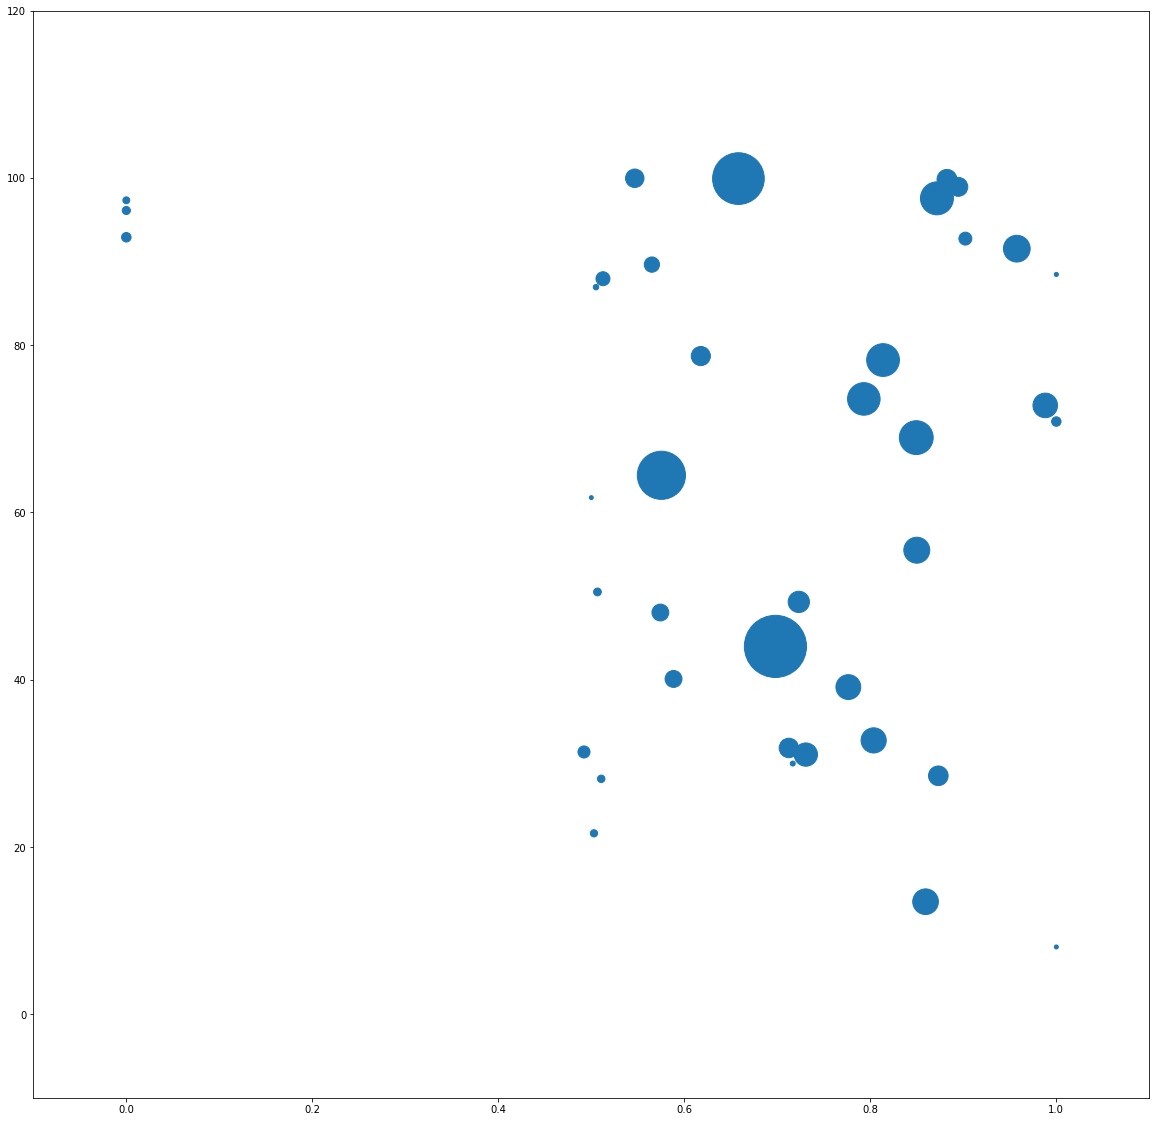

In [42]:
year_limit = 1880
data_events = df1[(df1.Year > year_limit) & (df1.Season == "Summer")].groupby(["Sport", "Sex"]).count()
data_events = data_events["ID"].reset_index(drop = False)
participantes = []
porcentaje_m = []
porcentaje_h = []
deportes = []
for i in data_events.Sport.unique():
    pps = data_events[data_events.Sport == i].ID.sum()
    participantes.append(pps)
    pps_m = data_events[(data_events.Sport == i) & (data_events.Sex == "F")].ID.sum()/pps
    porcentaje_m.append(pps_m)
    pps_h = abs(1-pps_m)
    porcentaje_h.append(pps_h)
    deportes.append(i)

plt.figure(figsize = (20,20))
part_per_sport = pd.DataFrame({"Sport":deportes, "PartTotal":participantes, "perc_muj":porcentaje_m,"perc_hom":porcentaje_h})
filtro = part_per_sport.PartTotal > 120
part_per_sport = part_per_sport[filtro]
randomy = np.random.uniform(low=0.5, high=100, size=len(part_per_sport))

plt.axis((-0.1,1.1,-10,120))
plt.scatter(part_per_sport.perc_hom, randomy,s = 0.1*part_per_sport.PartTotal )
 
plt.savefig("../Tarea1/Dibujos/pelotas.svg", format='svg')
plt.show()



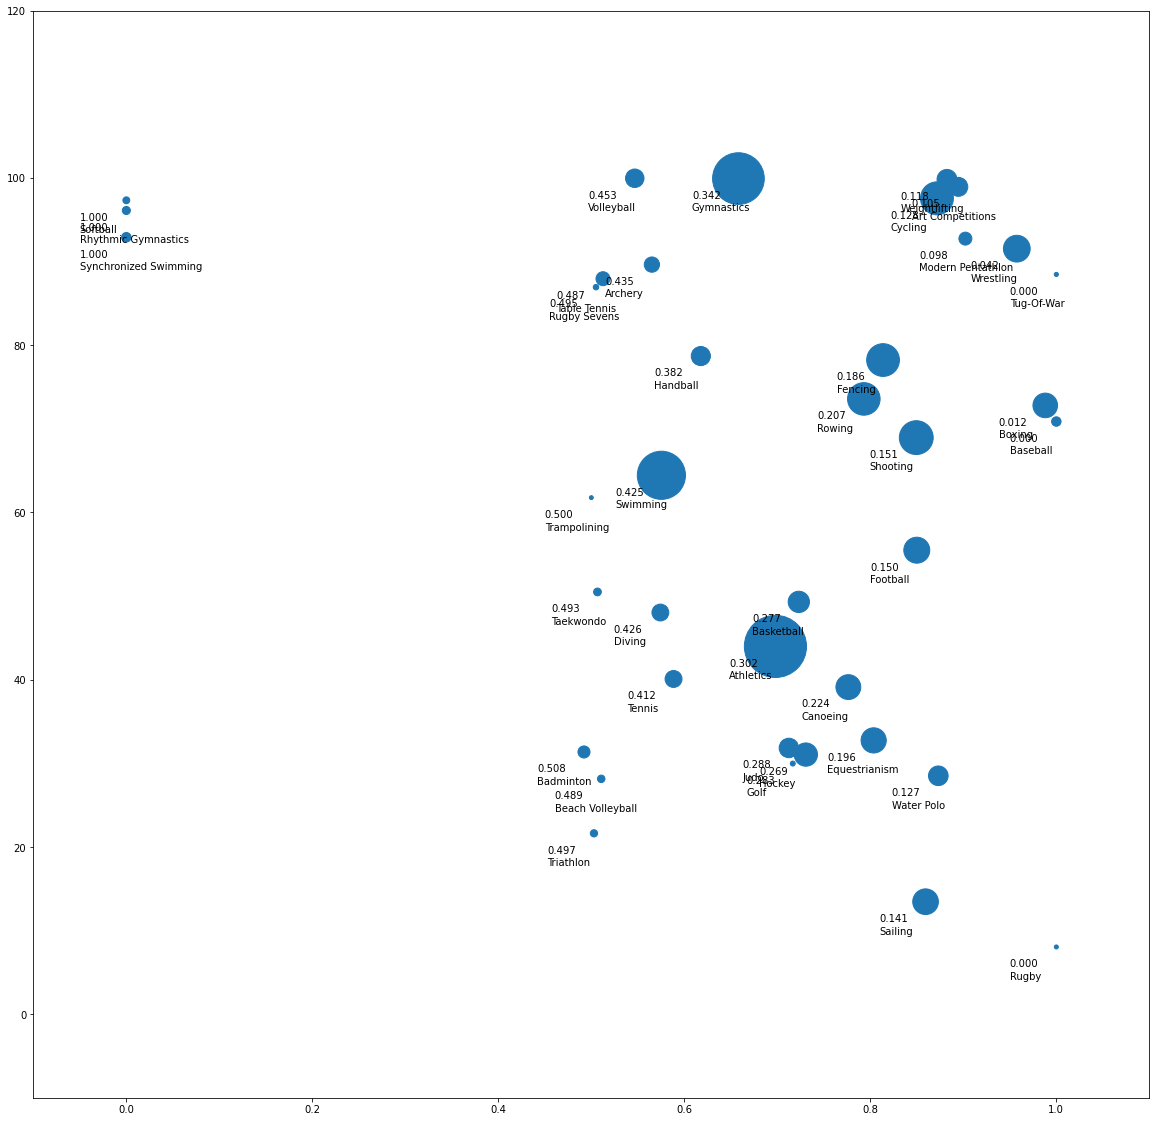

In [43]:
year_limit = 1880
data_events = df1[(df1.Year > year_limit) & (df1.Season == "Summer")].groupby(["Sport", "Sex"]).count()
data_events = data_events["ID"].reset_index(drop = False)
participantes = []
porcentaje_m = []
porcentaje_h = []
deportes = []
for i in data_events.Sport.unique():
    pps = data_events[data_events.Sport == i].ID.sum()
    participantes.append(pps)
    pps_m = data_events[(data_events.Sport == i) & (data_events.Sex == "F")].ID.sum()/pps
    porcentaje_m.append(pps_m)
    pps_h = abs(1-pps_m)
    porcentaje_h.append(pps_h)
    deportes.append(i)

plt.figure(figsize = (20,20))
part_per_sport = pd.DataFrame({"Sport":deportes, "PartTotal":participantes, "perc_muj":porcentaje_m,"perc_hom":porcentaje_h})
filtro = part_per_sport.PartTotal > 120
part_per_sport = part_per_sport[filtro]


plt.axis((-0.1,1.1,-10,120))
plt.scatter(part_per_sport.perc_hom, randomy,s = 0.1*part_per_sport.PartTotal )
 


for i, txt in enumerate(part_per_sport.Sport):
    plt.annotate(txt, (part_per_sport.perc_hom.to_numpy()[i]-0.05, randomy[i]-3.5), 
                horizontalalignment='left',
                verticalalignment='center')
    
for i, txt in enumerate(part_per_sport.perc_muj):
    plt.annotate("{:.3f}".format(txt), (part_per_sport.perc_hom.to_numpy()[i]-0.05, randomy[i]-2), 
                horizontalalignment='left',
                verticalalignment='center')
    
plt.savefig("../Tarea1/Dibujos/letras.svg", format='svg')
plt.show()